# Лабораторная работа №6

In [1]:
from sklearn.datasets import make_classification

## Генерация датасетов.

In [8]:
data1, data1_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)
data2, data2_y = make_classification(n_samples=1000, n_classes=4, n_features=4, n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=110)
data3, data3_y = make_classification(n_samples=100, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=110)

## Визуализация.

In [9]:
import matplotlib.pyplot as plt

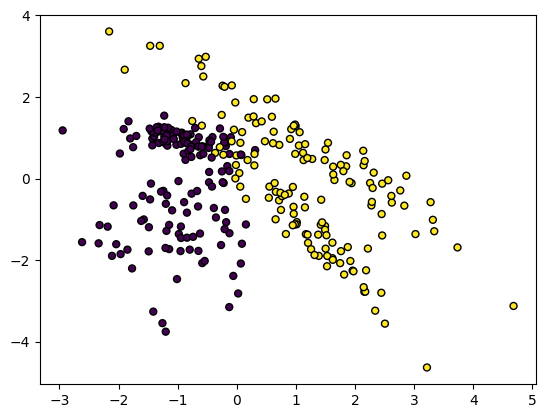

In [10]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

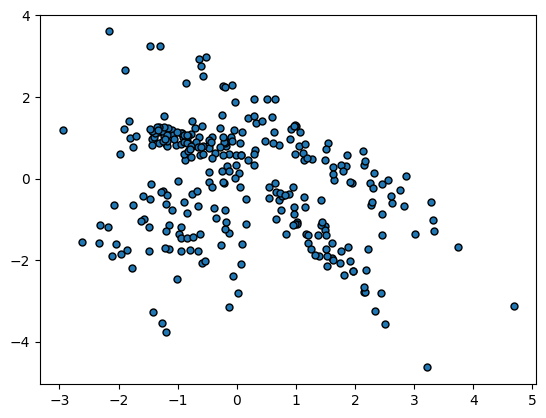

In [11]:
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

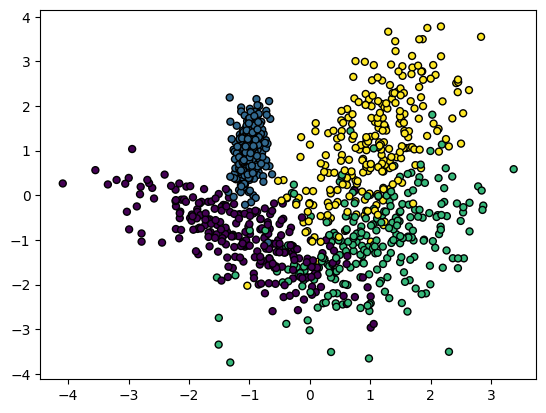

In [12]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

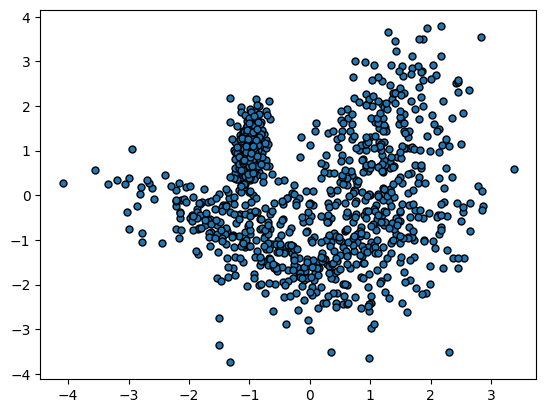

In [13]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

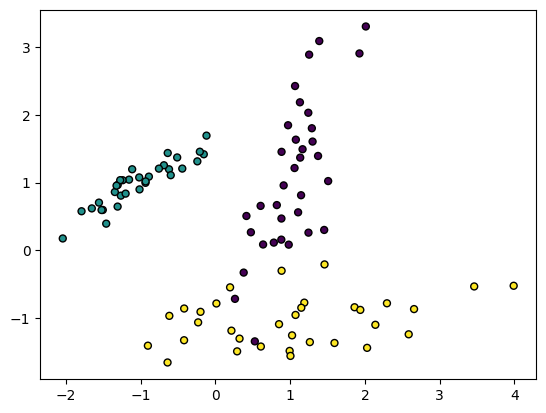

In [14]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

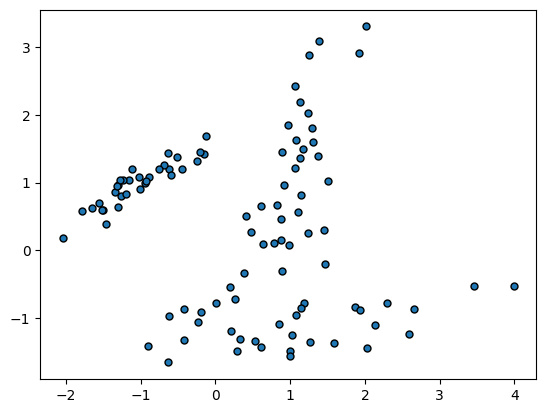

In [15]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## Кластеризация. KMeans.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans1 = KMeans(2, n_init='auto').fit(data1)

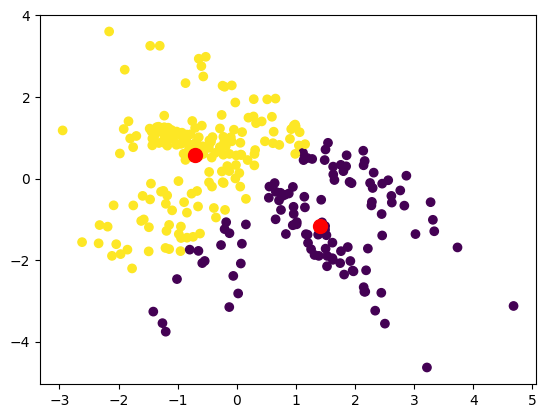

In [18]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, fowlkes_mallows_score

In [20]:
print(silhouette_score(data1, kmeans1.labels_))
print(calinski_harabasz_score(data1, kmeans1.labels_))

print(rand_score(kmeans1.labels_, data1_y))
print(fowlkes_mallows_score(kmeans1.labels_, data1_y))

0.43210036054559814
251.8038262758095
0.6305239687848383
0.6405833175789405


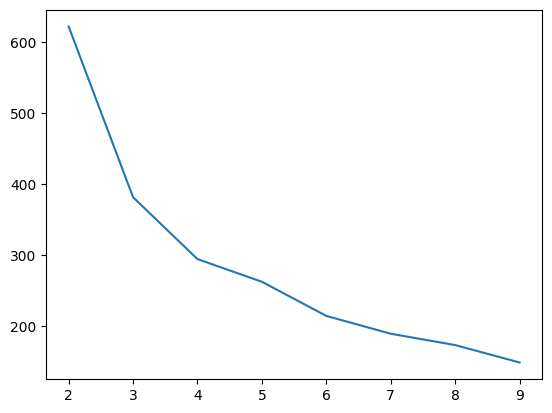

In [21]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data1)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

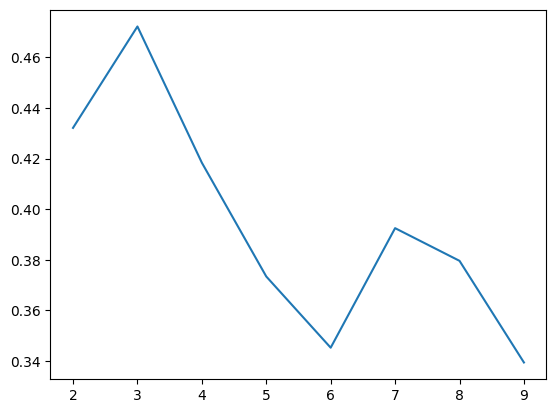

In [22]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

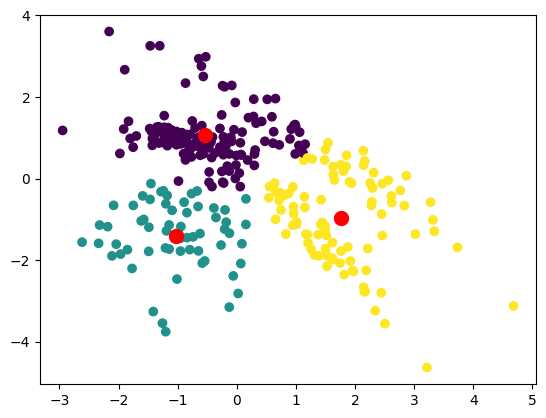

In [23]:
kmeans1 = KMeans(3, n_init='auto').fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [24]:
print(silhouette_score(data1, kmeans1.labels_))
print(calinski_harabasz_score(data1, kmeans1.labels_))

print(rand_score(kmeans1.labels_, data1_y))
print(fowlkes_mallows_score(kmeans1.labels_, data1_y))

0.47194565165276603
298.6853345886673
0.6492976588628763
0.603098962959408


## AffinityPropagation

In [25]:
from sklearn.cluster import AffinityPropagation

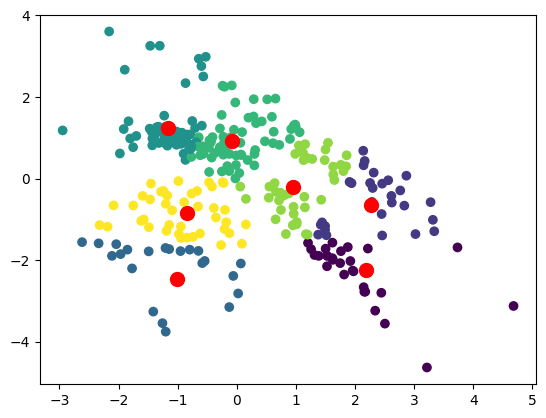

In [26]:
clustering1 = AffinityPropagation(preference=-42).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [27]:
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.33160227310328466
231.72847770374003
0.5888517279821628
0.43873620964248644


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
aff_prop = AffinityPropagation(random_state=42)
clustering_params = {'preference': list(range(-50, 40))}

In [30]:
Tree_best_grid = GridSearchCV(aff_prop,
                              clustering_params,
                              cv=5,
                              scoring='rand_score',
                              verbose=True).fit(data1, data1_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/Users/sergejkotov/Desktop/ml/venv/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/Users/sergejkot

In [31]:
Tree_best_grid.best_params_

{'preference': -49}

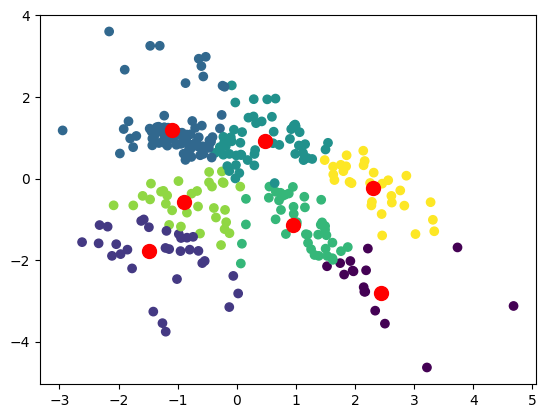

In [32]:
clustering1 = AffinityPropagation(preference=-49).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [33]:
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.36678119516006247
242.51283191373108
0.6016499442586399
0.4653602086867991


#dbscan1 = DBSCAN().fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)# DB Scan.

In [34]:
from sklearn.cluster import DBSCAN
import numpy as np

[-1  0]


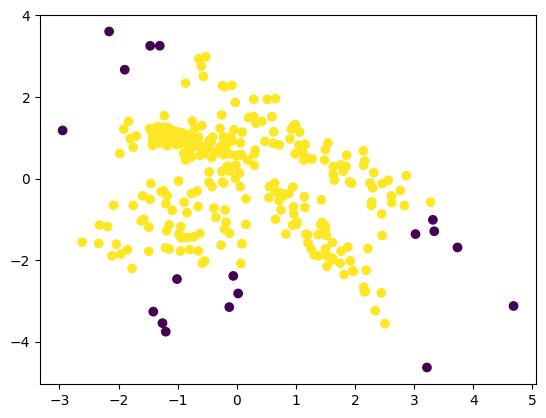

In [35]:
dbscan1 = DBSCAN().fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [36]:
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

0.3877833456312088
6.085276774216518
0.4984169453734671
0.6645593309404122


[-1  0  1  2  3  4  5]


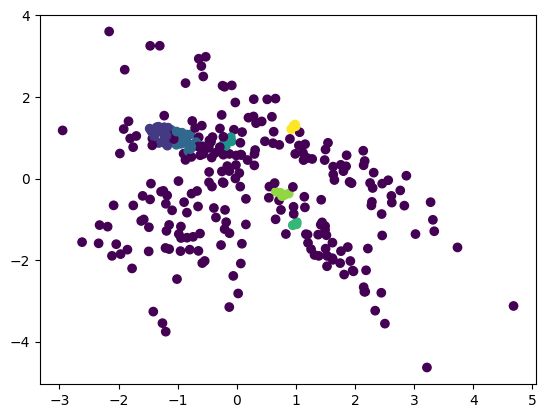

In [37]:
dbscan1 = DBSCAN(eps=0.1, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [38]:
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

-0.3049716754307235
7.816551910236337
0.5215161649944259
0.5817685163143381


In [39]:
from sklearn.neighbors import NearestNeighbors

In [40]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data1)
distances, indices = nbrs.kneighbors(data1)

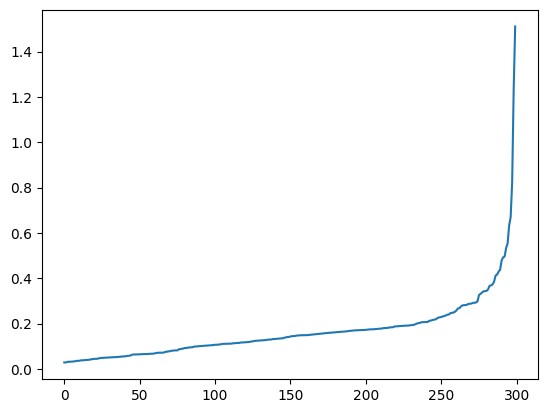

In [41]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

[-1  0  1  2  3  4  5]


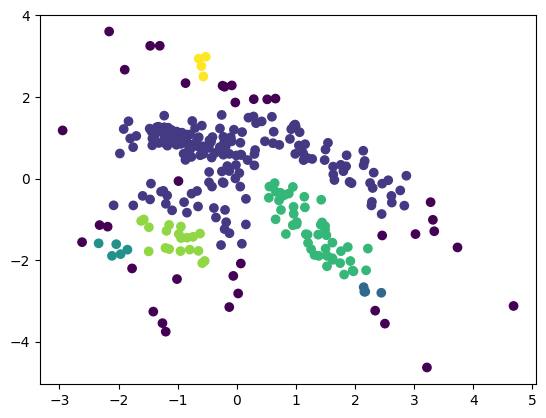

In [42]:
dbscan1 = DBSCAN(eps=0.35, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [43]:
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

0.07574821496511006
25.862176442124007
0.5492084726867336
0.5089764296704711


## GaussianMixture

In [44]:
from sklearn.mixture import GaussianMixture

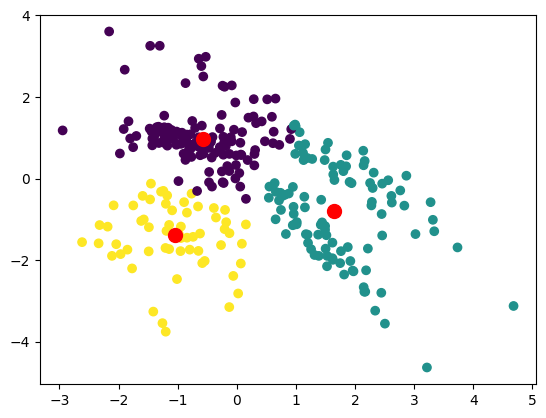

In [45]:
gm1 = GaussianMixture(n_components=3).fit(data1)

с = gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=с)
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

In [46]:
print(silhouette_score(data1, с))
print(calinski_harabasz_score(data1, с))

print(rand_score(с, data1_y))
print(fowlkes_mallows_score(с, data1_y))

0.4646140976155251
284.23449682297996
0.6737346711259755
0.6302100754549465


## HierarchyClustering

In [47]:
from scipy.cluster import hierarchy

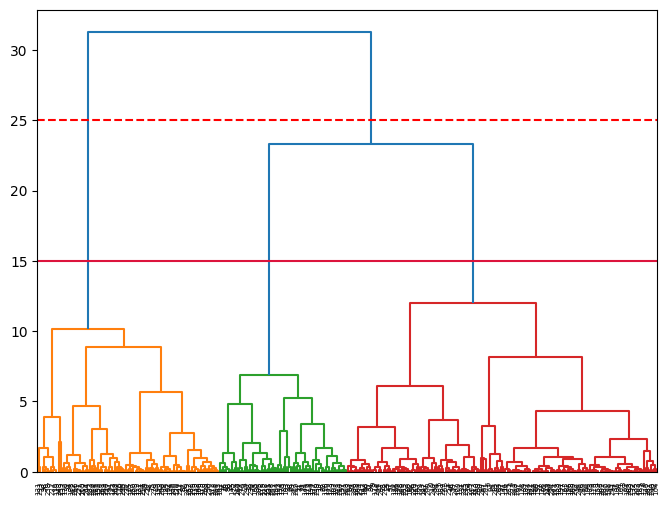

In [48]:
clusters1 = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters1)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

## AgglomerativeClustering

In [49]:
from sklearn.cluster import AgglomerativeClustering

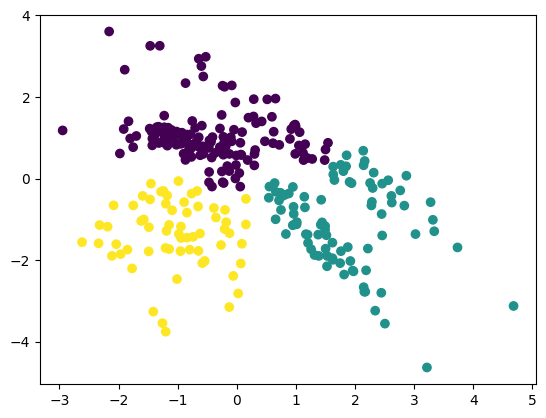

In [50]:
clustering1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)

In [51]:
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.4645049678610273
292.45081304581856
0.6335340022296544
0.586883905829729


## SOM.

In [53]:
!pip install sklearn_som

In [54]:
from sklearn_som.som import SOM

In [55]:
som1 = SOM(m=2, n=2, dim=2)
som1.fit(data1)

In [56]:
predictions1 = som1.predict(data1)

In [57]:
print(silhouette_score(data1, predictions1))
print(calinski_harabasz_score(data1, predictions1))

print(rand_score(predictions1, data1_y))
print(fowlkes_mallows_score(predictions1, data1_y))

0.34515937764711285
242.29037157391832
0.6783723522853957
0.6101863136677065


## Быстро повторим все процедуры для второго и третьего наборов данных.

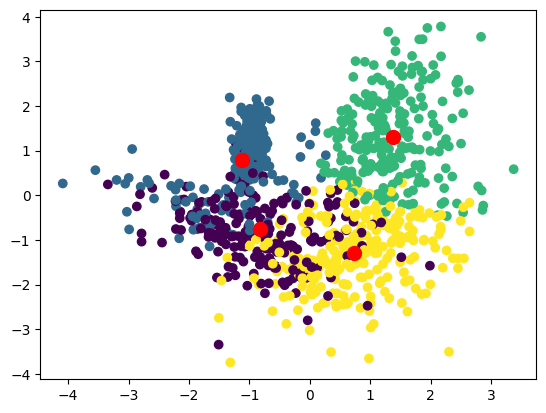

In [58]:
kmeans2 = KMeans(4, n_init='auto').fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')